**objective: To predict the Fraudulent cases** 

# Import Necessary Libraries

In [1]:
import pandas as pd   # Data preprocessing
import numpy as np    # For linear algebra(numerical python)

# Import Dataset

In [2]:
insurance_data = pd.read_csv('insurance Dataset.csv')
insurance_data.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


# Data Understanding

## Intial Analysis

In [3]:
insurance_data.shape

(1048575, 24)

In [4]:
insurance_data.dtypes

Area_Service                              object
Hospital County                           object
Hospital Id                              float64
Age                                       object
Gender                                    object
Cultural_group                            object
ethnicity                                 object
Days_spend_hsptl                          object
Admission_type                            object
Home or self care,                        object
ccs_diagnosis_code                         int64
ccs_procedure_code                         int64
apr_drg_description                       object
Code_illness                               int64
Mortality risk                           float64
Surg_Description                          object
Weight_baby                                int64
Abortion                                  object
Emergency dept_yes/No                     object
Tot_charg                                float64
Tot_cost            

In [5]:
pd.set_option('max_columns',None)
insurance_data.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [6]:
insurance_data.isna().sum()

Area_Service                             2456
Hospital County                          2456
Hospital Id                              2456
Age                                         0
Gender                                      0
Cultural_group                              0
ethnicity                                   0
Days_spend_hsptl                            0
Admission_type                              0
Home or self care,                          0
ccs_diagnosis_code                          0
ccs_procedure_code                          0
apr_drg_description                         0
Code_illness                                0
Mortality risk                             42
Surg_Description                            0
Weight_baby                                 0
Abortion                                    0
Emergency dept_yes/No                       0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_char

In [7]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [8]:
insurance_data.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [9]:
insurance_data.describe(include='all')

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
count,1046119,1046119,1.046119e+06,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048533e+06,1048575,1.048575e+06,1048575,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
unique,7,51,NaN,5,3,4,3,120,6,19,NaN,NaN,316,NaN,NaN,3,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,Hudson Valley,Erie,NaN,70 or Older,F,White,Not Span/Hispanic,2,Emergency,Home or Self Care,NaN,NaN,"Neonate birthwt >2499g, normal newborn or neon...",NaN,NaN,Medical,NaN,N,Y,NaN,NaN,NaN,NaN,NaN
freq,261074,129242,NaN,306017,593506,781658,910555,236538,608595,694841,NaN,NaN,80169,NaN,NaN,805729,NaN,1047110,589954,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.529400e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.987936e+02,9.723249e+01,NaN,2.051806e+00,1.748955e+00,NaN,2.935512e+02,NaN,NaN,2.708697e+04,1.046399e+04,4.565822e-01,7.499769e-01,1.935755e+00
std,NaN,NaN,6.711577e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.652839e+02,8.732697e+01,NaN,9.145785e-01,9.864236e-01,NaN,9.494631e+02,NaN,NaN,5.487428e+04,2.230366e+04,8.029246e-01,4.330263e-01,7.717916e-01
min,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,NaN,0.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,3.100000e-01,1.000000e-01,3.312909e-02,0.000000e+00,1.000000e+00
25%,NaN,NaN,2.130000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.080000e+02,0.000000e+00,NaN,1.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,7.402500e+03,3.234570e+03,3.135802e-01,0.000000e+00,1.000000e+00
50%,NaN,NaN,6.300000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.590000e+02,9.000000e+01,NaN,2.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,1.458988e+04,5.928480e+03,4.091384e-01,1.000000e+00,2.000000e+00
75%,NaN,NaN,9.770000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.180000e+02,1.740000e+02,NaN,3.000000e+00,3.000000e+00,NaN,0.000000e+00,NaN,NaN,2.914547e+04,1.134317e+04,5.192548e-01,1.000000e+00,3.000000e+00


# EDA (Exploratory Data Analysis)

In [10]:
insurance_data.isna().mean()

Area_Service                             0.002342
Hospital County                          0.002342
Hospital Id                              0.002342
Age                                      0.000000
Gender                                   0.000000
Cultural_group                           0.000000
ethnicity                                0.000000
Days_spend_hsptl                         0.000000
Admission_type                           0.000000
Home or self care,                       0.000000
ccs_diagnosis_code                       0.000000
ccs_procedure_code                       0.000000
apr_drg_description                      0.000000
Code_illness                             0.000000
Mortality risk                           0.000040
Surg_Description                         0.000000
Weight_baby                              0.000000
Abortion                                 0.000000
Emergency dept_yes/No                    0.000000
Tot_charg                                0.000000


In [11]:
insurance_data['Age'].value_counts()

70 or Older    306017
50 to 69       282013
30 to 49       198827
0 to 17        144607
18 to 29       117111
Name: Age, dtype: int64

In [12]:
insurance_data['Gender'].value_counts()

F    593506
M    455019
U        50
Name: Gender, dtype: int64

In [13]:
insurance_data['Result'].value_counts()

1    786407
0    262168
Name: Result, dtype: int64

In [14]:
insurance_data['Admission_type'].value_counts()

Emergency        608595
Elective         235655
Urgent           110338
Newborn           90709
Trauma             2258
Not Available      1020
Name: Admission_type, dtype: int64

In [15]:
insurance_data['Days_spend_hsptl'].value_counts()

2      236538
3      190386
1      155855
4      113797
5       73684
        ...  
108        20
116        20
110        19
101        15
113         7
Name: Days_spend_hsptl, Length: 120, dtype: int64

In [16]:
insurance_data[insurance_data.duplicated()].shape

(4814, 24)

In [17]:
insurance_data_1=insurance_data.drop_duplicates()

In [18]:
insurance_data_1[insurance_data_1.duplicated()].shape

(0, 24)

In [19]:
insurance_data_1.shape

(1043761, 24)

In [20]:
insurance_data_1.dropna(inplace=True)

import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [21]:
insurance_data_1.isna().sum()

Area_Service                             0
Hospital County                          0
Hospital Id                              0
Age                                      0
Gender                                   0
Cultural_group                           0
ethnicity                                0
Days_spend_hsptl                         0
Admission_type                           0
Home or self care,                       0
ccs_diagnosis_code                       0
ccs_procedure_code                       0
apr_drg_description                      0
Code_illness                             0
Mortality risk                           0
Surg_Description                         0
Weight_baby                              0
Abortion                                 0
Emergency dept_yes/No                    0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typ

In [22]:
insurance_data_1.shape

(1041265, 24)

**Drop Unnecessary Columns**

In [23]:
fraud_data=insurance_data_1.drop(['Area_Service','Hospital Id','Home or self care,','ccs_procedure_code','Cultural_group','ethnicity','Weight_baby','Abortion'],axis=1)

In [24]:
fraud_data.head()

,Hospital County,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Allegany,30 to 49,F,4,Elective,122,Other pneumonia,1,1.0,Medical,Y,5511.95,5582.49,1.012798,1,1
1,Allegany,70 or Older,F,4,Urgent,197,Cellulitis & other skin infections,3,2.0,Medical,Y,4783.20,5162.82,1.079365,1,1
2,Allegany,30 to 49,F,3,Urgent,122,Other pneumonia,1,1.0,Medical,Y,3829.15,4056.52,1.059379,1,1
3,Allegany,0 to 17,F,1,Urgent,122,Other pneumonia,1,1.0,Medical,Y,1108.20,1644.75,1.484167,0,1
4,Allegany,70 or Older,F,3,Elective,122,Other pneumonia,2,3.0,Medical,Y,3418.18,3370.87,0.986161,1,1


**converting categorical to numerical**

In [25]:
fraud_data.select_dtypes(include=['object']).head()

,Hospital County,Age,Gender,Days_spend_hsptl,Admission_type,apr_drg_description,Surg_Description,Emergency dept_yes/No
0,Allegany,30 to 49,F,4,Elective,Other pneumonia,Medical,Y
1,Allegany,70 or Older,F,4,Urgent,Cellulitis & other skin infections,Medical,Y
2,Allegany,30 to 49,F,3,Urgent,Other pneumonia,Medical,Y
3,Allegany,0 to 17,F,1,Urgent,Other pneumonia,Medical,Y
4,Allegany,70 or Older,F,3,Elective,Other pneumonia,Medical,Y


In [26]:
fraud_data['Days_spend_hsptl'].unique()

array(['4', '3', '1', '2', '5', '6', '14', '12', '9', '8', '10', '7',
       '22', '11', '16', '15', '25', '13', '17', '28', '18', '19', '23',
       '38', '20', '24', '26', '21', '27', '30', '29', '39', '87', '35',
       '37', '32', '55', '56', '49', '110', '69', '75', '42', '51', '47',
       '45', '46', '40', '34', '79', '43', '120 +', '65', '41', '31',
       '50', '59', '44', '36', '70', '115', '58', '94', '33', '68', '67',
       '54', '80', '85', '95', '78', '91', '88', '48', '52', '63', '57',
       '74', '64', '53', '62', '97', '72', '118', '81', '90', '86', '106',
       '112', '105', '114', '66', '89', '83', '84', '82', '93', '116',
       '71', '60', '73', '61', '92', '76', '96', '77', '104', '100',
       '103', '102', '117', '108', '99', '107', '98', '101', '119', '111',
       '109', '113'], dtype=object)

In [27]:
fraud_data['Days_spend_hsptl'].nunique()

120

**So its showing the object(120+),so convert into the numerical**

In [28]:
fraud_data.replace({'Days_spend_hsptl':'120 +'},121,inplace=True)

In [29]:
fraud_data.Days_spend_hsptl=fraud_data.Days_spend_hsptl.astype('int')

**Data transformation techniques if the data is DISCRETE by using Label encoder**

**converting the labels into a numeric form**

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
lable = LabelEncoder()
fraud_data['Hospital County']=lable.fit_transform(fraud_data['Hospital County'])
fraud_data['Age']=lable.fit_transform(fraud_data['Age'])
fraud_data['Gender']=lable.fit_transform(fraud_data['Gender'])
fraud_data['Admission_type']=lable.fit_transform(fraud_data['Admission_type'])
fraud_data['apr_drg_description']=lable.fit_transform(fraud_data['apr_drg_description'])
fraud_data['Surg_Description']=lable.fit_transform(fraud_data['Surg_Description'])
fraud_data['Emergency dept_yes/No']=lable.fit_transform(fraud_data['Emergency dept_yes/No'])

In [32]:
fraud_data.head()

,Hospital County,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,1,2,0,4,0,122,237,1,1.0,0,1,5511.95,5582.49,1.012798,1,1
1,1,4,0,4,5,197,38,3,2.0,0,1,4783.20,5162.82,1.079365,1,1
2,1,2,0,3,5,122,237,1,1.0,0,1,3829.15,4056.52,1.059379,1,1
3,1,0,0,1,5,122,237,1,1.0,0,1,1108.20,1644.75,1.484167,0,1
4,1,4,0,3,0,122,237,2,3.0,0,1,3418.18,3370.87,0.986161,1,1


In [33]:
fraud_data.dtypes

Hospital County                            int32
Age                                        int32
Gender                                     int32
Days_spend_hsptl                           int32
Admission_type                             int32
ccs_diagnosis_code                         int64
apr_drg_description                        int32
Code_illness                               int64
Mortality risk                           float64
Surg_Description                           int32
Emergency dept_yes/No                      int32
Tot_charg                                float64
Tot_cost                                 float64
ratio_of_total_costs_to_total_charges    float64
Result                                     int64
Payment_Typology                           int64
dtype: object

# Data Visualization

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

**Univarient analysis**

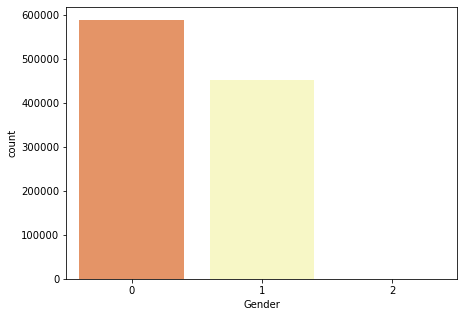

In [35]:
plt.figure(figsize=(7,5))
sns.countplot(x='Gender',data=fraud_data,palette='Spectral')
plt.show()

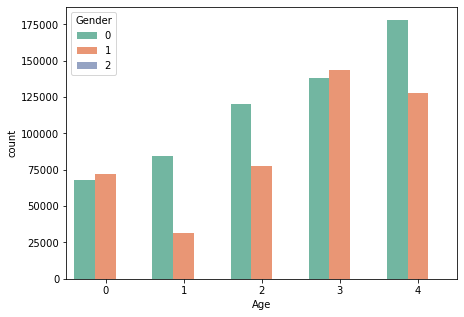

In [36]:
plt.figure(figsize=(7,5))
sns.countplot(x='Age',data=fraud_data,hue='Gender',palette='Set2')
plt.show()

<AxesSubplot:xlabel='Result', ylabel='count'>

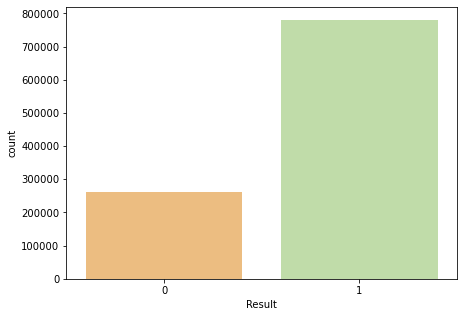

In [37]:
plt.figure(figsize=(7,5))
sns.countplot(x='Result',data=fraud_data,palette='Spectral')

In [38]:
fraud_data['Age'].value_counts()

4    305802
3    281714
2    197730
0    140040
1    115979
Name: Age, dtype: int64

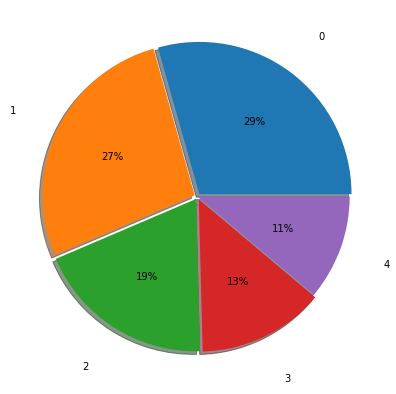

In [39]:
plt.figure(figsize=(7,7))
plt.pie(fraud_data['Age'].value_counts(),labels=[0,1,2,3,4],autopct='%1.0f%%', labeldistance=1.3,explode=[0.02,0.02,0.02,0.02,0],shadow=True)
plt.show()

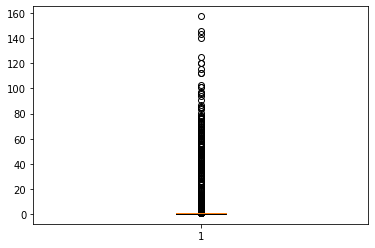

In [40]:
plt.boxplot(x='ratio_of_total_costs_to_total_charges',data=fraud_data)
plt.show()

**Bivarient analysis**

In [41]:
#In Bar plot the x label should be discrete and y label should be continuous

<AxesSubplot:xlabel='Age', ylabel='ratio_of_total_costs_to_total_charges'>

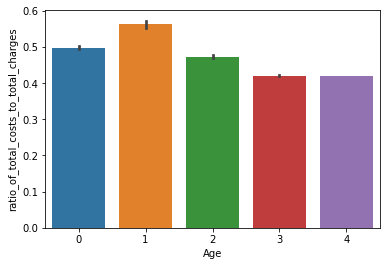

In [42]:
sns.barplot(x='Age',y='ratio_of_total_costs_to_total_charges',data=fraud_data)

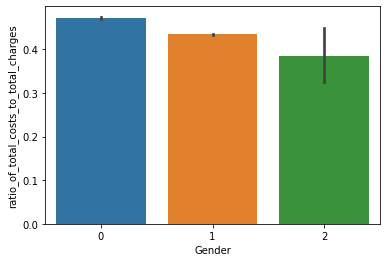

In [43]:
sns.barplot(x='Gender',y='ratio_of_total_costs_to_total_charges',data=fraud_data)
plt.show()

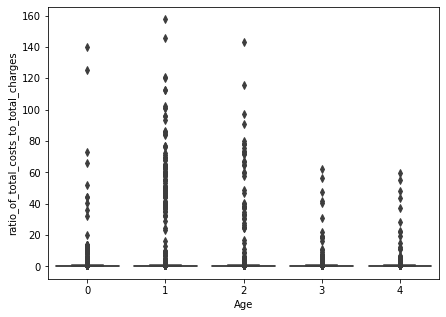

In [44]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Age',y='ratio_of_total_costs_to_total_charges',data=fraud_data)
plt.show()

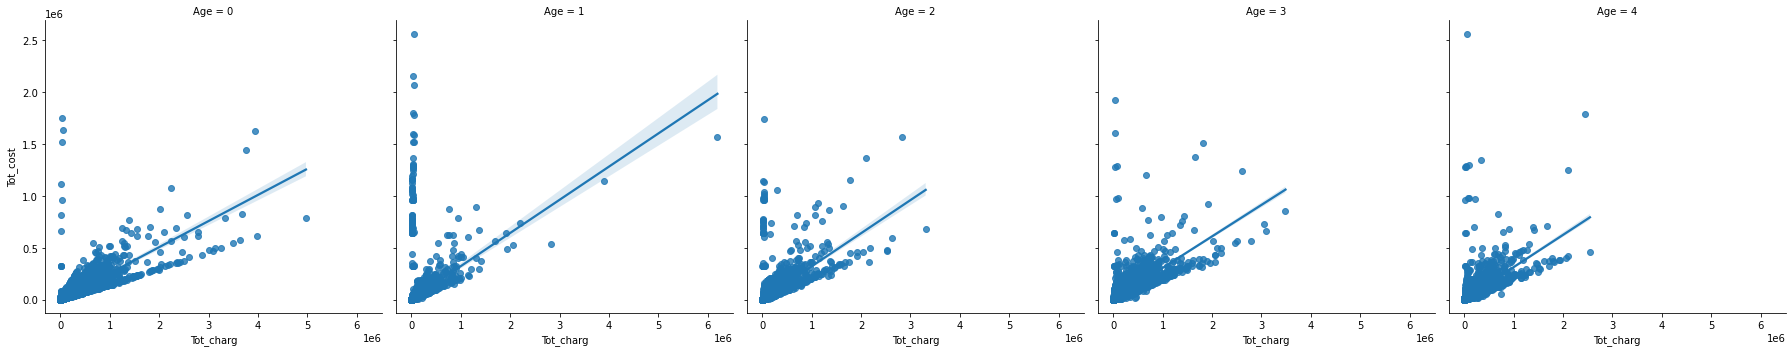

In [45]:
sns.lmplot(x='Tot_charg',y='Tot_cost',data=fraud_data,col='Age',palette = "rocket")

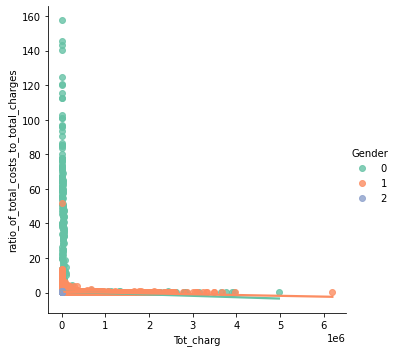

In [46]:
sns.lmplot(x='Tot_charg',y='ratio_of_total_costs_to_total_charges',data=fraud_data,hue='Gender',palette = "Set2")

In [47]:
corr=fraud_data.corr()
corr

,Hospital County,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
Hospital County,1.000000,0.026279,0.002148,0.015699,-0.004961,0.075190,-0.001563,-0.037452,-0.014600,-0.053254,-0.047489,-0.002326,-0.007147,0.003692,-0.001342,0.028792
Age,0.026279,1.000000,0.010131,0.091584,-0.109385,-0.223039,-0.050463,0.413520,0.498528,0.092201,0.342891,0.099697,0.084832,-0.049608,0.001983,0.251620
Gender,0.002148,0.010131,1.000000,0.045334,0.007178,0.063092,-0.080038,0.066807,0.067085,-0.036425,0.077533,0.046209,0.030831,-0.023177,-0.000066,-0.007203
Days_spend_hsptl,0.015699,0.091584,0.045334,1.000000,0.016057,0.130784,0.011447,0.324900,0.211171,0.024698,0.026482,0.666919,0.616737,0.001375,-0.000711,0.057573
Admission_type,-0.004961,-0.109385,0.007178,0.016057,1.000000,0.012607,0.025071,0.019216,0.013942,-0.163797,-0.076151,-0.031345,-0.022222,0.022305,-0.001403,0.013427
ccs_diagnosis_code,0.075190,-0.223039,0.063092,0.130784,0.012607,1.000000,-0.160681,-0.181906,-0.269338,-0.148600,-0.100412,-0.076322,-0.041976,0.030690,0.000317,-0.075115
apr_drg_description,-0.001563,-0.050463,-0.080038,0.011447,0.025071,-0.160681,1.000000,0.038844,0.017540,-0.093320,-0.092659,0.004112,0.006810,0.020936,0.000467,-0.004080
Code_illness,-0.037452,0.413520,0.066807,0.324900,0.019216,-0.181906,0.038844,1.000000,0.635410,-0.084941,0.307177,0.290234,0.246470,-0.033883,0.002065,0.155879
Mortality risk,-0.014600,0.498528,0.067085,0.211171,0.013942,-0.269338,0.017540,0.635410,1.000000,-0.068615,0.294515,0.221497,0.181717,-0.036955,0.002483,0.182199
Surg_Description,-0.053254,0.092201,-0.036425,0.024698,-0.163797,-0.148600,-0.093320,-0.084941,-0.068615,1.000000,-0.277383,0.210457,0.192765,-0.010672,-0.002039,-0.019396


<AxesSubplot:>

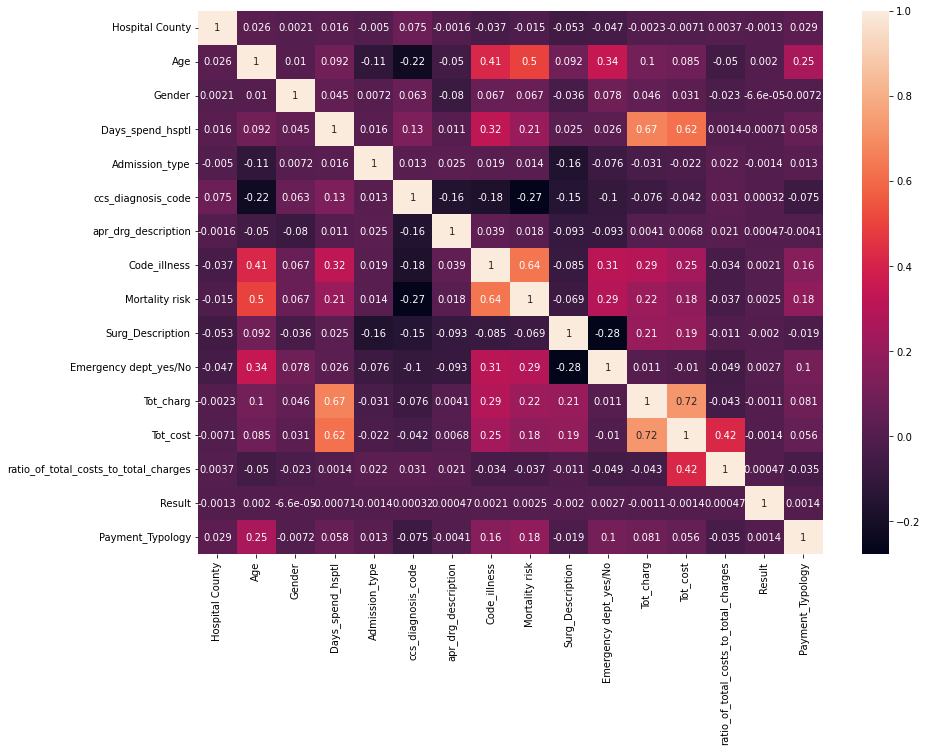

In [48]:
plt.figure(figsize=(14,10))
sns.heatmap(data=corr,annot =True)